In [148]:
import os
import cv2
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [149]:
# Define the size of the images
img_size = (224, 224)

In [150]:
# Define the path to the dataset directory
data_dir = 'Multi-class Weather Dataset'

# Define the labels and the corresponding integer codes
labels = {"Cloudy": 0, "Rain": 1, "Shine": 2, "Sunrise": 3}

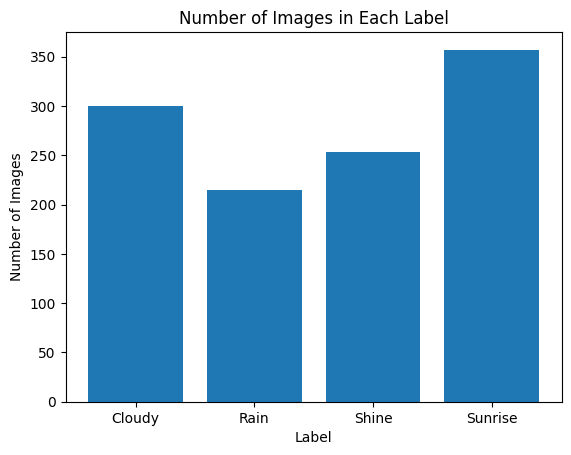

In [151]:
# Count the number of images in each label
num_images = [len(os.listdir(os.path.join(data_dir, label))) for label in labels]

# Plot the graph
plt.bar(labels.keys(), num_images)
plt.title("Number of Images in Each Label")
plt.xlabel("Label")
plt.ylabel("Number of Images")
plt.show()


In [152]:
# Initialize the lists to store the images and labels
images = []
labels_list = []

In [153]:
# Loop over the images in each category
for label, code in labels.items():
    dir_path = os.path.join(data_dir, label)
    for img_name in os.listdir(dir_path):
        img_path = os.path.join(dir_path, img_name)
        if not os.path.exists(img_path):
            continue
        #print(f"Reading image from path: {img_path}")
        # Load the image and resize it to the desired size
        img = cv2.imread(img_path)
        if img is None:
            #print(f"Could not read image from path: {img_path}")
            continue
        img = cv2.resize(img, img_size)
        # Append the image and its label to the lists
        images.append(img)
        labels_list.append(code)

In [154]:
print(len(images))

1123


In [155]:
# Convert the images and labels lists to numpy arrays
X = np.array(images)
y = np.array(labels_list)

In [156]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Random Forest Algorithm  

In [158]:
# Define the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [159]:
# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [160]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [161]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8444444444444444


In [162]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        61
           1       0.77      0.68      0.72        44
           2       0.89      0.89      0.89        53
           3       0.94      0.99      0.96        67

    accuracy                           0.84       225
   macro avg       0.84      0.83      0.83       225
weighted avg       0.84      0.84      0.84       225



In [163]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[47  9  5  0]
 [10 30  1  3]
 [ 5  0 47  1]
 [ 1  0  0 66]]


For the "Cloudy" class (first row), there were 47 instances that were correctly classified as "Cloudy" (true positives), while 9 were incorrectly classified as "Rain" (false negatives), 5 were incorrectly classified as "Shine" (false negatives), and none were incorrectly classified as "Sunrise" (true negatives).

For the "Rain" class (second row), there were 30 instances that were correctly classified as "Rain" (true positives), while 10 were incorrectly classified as "Cloudy" (false negatives), 1 was incorrectly classified as "Shine" (false negatives), and 3 were incorrectly classified as "Sunrise" (false negatives).

For the "Shine" class (third row), there were 47 instances that were correctly classified as "Shine" (true positives), while 5 were incorrectly classified as "Cloudy" (false negatives), none were incorrectly classified as "Rain" (true negatives), and 1 was incorrectly classified as "Sunrise" (false negatives).

For the "Sunrise" class (fourth row), there were 66 instance

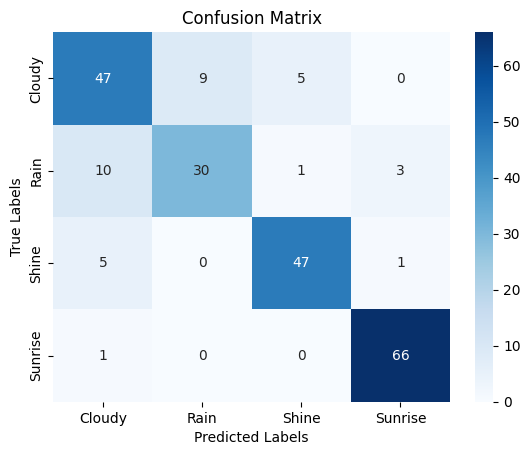

In [164]:
# Define the label names
label_names = list(labels.keys())

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=label_names, yticklabels=label_names)

# Add labels to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Understading the confusion matrix
print('For the "Cloudy" class (first row), there were 47 instances that were correctly classified as "Cloudy" (true positives), while 9 were incorrectly classified as "Rain" (false negatives), 5 were incorrectly classified as "Shine" (false negatives), and none were incorrectly classified as "Sunrise" (true negatives).\n\nFor the "Rain" class (second row), there were 30 instances that were correctly classified as "Rain" (true positives), while 10 were incorrectly classified as "Cloudy" (false negatives), 1 was incorrectly classified as "Shine" (false negatives), and 3 were incorrectly classified as "Sunrise" (false negatives).\n\nFor the "Shine" class (third row), there were 47 instances that were correctly classified as "Shine" (true positives), while 5 were incorrectly classified as "Cloudy" (false negatives), none were incorrectly classified as "Rain" (true negatives), and 1 was incorrectly classified as "Sunrise" (false negatives).\n\nFor the "Sunrise" class (fourth row), there were 66 instances that were correctly classified as "Sunrise" (true positives), while 1 were incorrectly classified as "Cloudy" (false negatives), none were incorrectly classified as "Rain" (true negatives), and none were incorrectly classified as "Shine" (true negatives).')

In [165]:
# Load a new image to predict its label
new_img_path = "Multi-class Weather Dataset/Test/Cloudy/cloud.jpg"
if not os.path.exists(new_img_path):
    print(f"Could not find image at path: {new_img_path}")
    exit(1)
new_img = cv2.imread(new_img_path)
if new_img is None:
    print(f"Could not read image from path: {new_img_path}")
    exit(1)
new_img = cv2.resize(new_img, img_size)

In [166]:
# Flatten the image
new_img = new_img.reshape(1, -1)

# Predict the label of the new image
new_img_label = clf.predict(new_img)

# Print the predicted label
for label, code in labels.items():
    if code == new_img_label:
        print("Predicted label:", label)
        break
       

Predicted label: Cloudy


# SVM Classifier

In [167]:
# Define the classifier
clf = SVC(kernel='linear', random_state=42)

In [168]:
# Train the classifier
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [169]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [170]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8577777777777778


In [171]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        61
           1       0.83      0.68      0.75        44
           2       0.90      0.89      0.90        53
           3       1.00      0.94      0.97        67

    accuracy                           0.86       225
   macro avg       0.86      0.84      0.85       225
weighted avg       0.87      0.86      0.86       225



In [172]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[53  5  3  0]
 [13 30  1  0]
 [ 5  1 47  0]
 [ 3  0  1 63]]


Text(0.5, 1.0, 'Confusion Matrix')

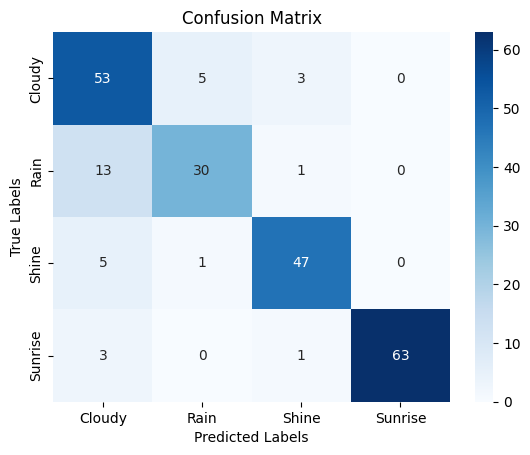

In [173]:
# Define the label names
label_names = list(labels.keys())

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=label_names, yticklabels=label_names)

# Add labels to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [174]:
# Load a new image to predict its label
new_img_path = "Multi-class Weather Dataset/Test/Cloudy/cloud.jpg"
if not os.path.exists(new_img_path):
    print(f"Could not find image at path: {new_img_path}")
    exit(1)
new_img = cv2.imread(new_img_path)
if new_img is None:
    print(f"Could not read image from path: {new_img_path}")
    exit(1)
new_img = cv2.resize(new_img, img_size)

In [175]:
# Flatten the image
new_img = new_img.reshape(1, -1)

# Predict the label of the new image
new_img_label = clf.predict(new_img)

# Print the predicted label
for label, code in labels.items():
    if code == new_img_label:
        print("Predicted label:", label)
        break

Predicted label: Cloudy


# Logistic Regression

In [176]:
# Create the logistic regression classifier
clf = LogisticRegression(random_state=42,max_iter=1000)

In [177]:
# Train the classifier
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [178]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [179]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7911111111111111


In [180]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        61
           1       0.74      0.64      0.68        44
           2       0.81      0.79      0.80        53
           3       0.98      0.93      0.95        67

    accuracy                           0.79       225
   macro avg       0.79      0.78      0.78       225
weighted avg       0.80      0.79      0.79       225



In [181]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[46  8  6  1]
 [14 28  2  0]
 [10  1 42  0]
 [ 2  1  2 62]]


Text(0.5, 1.0, 'Confusion Matrix')

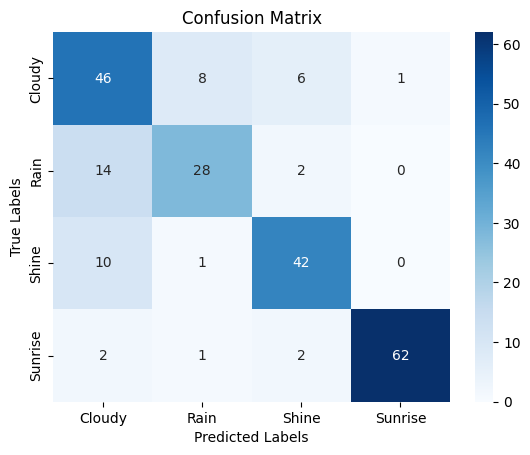

In [182]:
# Define the label names
label_names = list(labels.keys())

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=label_names, yticklabels=label_names)

# Add labels to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [183]:
# Load a new image to predict its label
new_img_path = "Multi-class Weather Dataset/Test/Cloudy/cloud.jpg"
if not os.path.exists(new_img_path):
    print(f"Could not find image at path: {new_img_path}")
    exit(1)
new_img = cv2.imread(new_img_path)
if new_img is None:
    print(f"Could not read image from path: {new_img_path}")
    exit(1)
new_img = cv2.resize(new_img, img_size)

In [184]:
# Flatten the image
new_img = new_img.reshape(1, -1)

# Predict the label of the new image
new_img_label = clf.predict(new_img)

# Print the predicted label
for label, code in labels.items():
    if code == new_img_label:
        print("Predicted label:", label)
        break

Predicted label: Cloudy


# KNeighborsClassifier 

In [185]:
# Define the classifier
clf = KNeighborsClassifier(n_neighbors=3)

In [186]:
# Train the classifier
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [187]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [188]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.7288888888888889
              precision    recall  f1-score   support

           0       0.55      0.59      0.57        61
           1       0.54      0.66      0.59        44
           2       0.93      0.70      0.80        53
           3       0.95      0.93      0.94        67

    accuracy                           0.73       225
   macro avg       0.74      0.72      0.72       225
weighted avg       0.75      0.73      0.74       225



In [189]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[36 20  3  2]
 [14 29  0  1]
 [13  3 37  0]
 [ 3  2  0 62]]


Text(0.5, 1.0, 'Confusion Matrix')

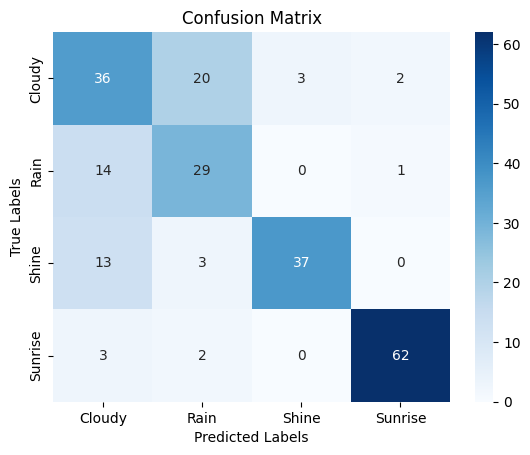

In [190]:
# Define the label names
label_names = list(labels.keys())

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=label_names, yticklabels=label_names)

# Add labels to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [191]:
# Load a new image to predict its label
new_img_path = "Multi-class Weather Dataset/Test/Cloudy/cloud.jpg"
if not os.path.exists(new_img_path):
    print(f"Could not find image at path: {new_img_path}")
    exit(1)
new_img = cv2.imread(new_img_path)
if new_img is None:
    print(f"Could not read image from path: {new_img_path}")
    exit(1)
new_img = cv2.resize(new_img, img_size)

In [193]:
# Flatten the image
new_img = new_img.reshape(1, -1)

# Predict the label of the new image
new_img_label = clf.predict(new_img)

# Print the predicted label
for label, code in labels.items():
    if code == new_img_label:
        print("Predicted label:", label)
        break

Predicted label: Rain


# Accuracy Graph. SVM gives best accuracy

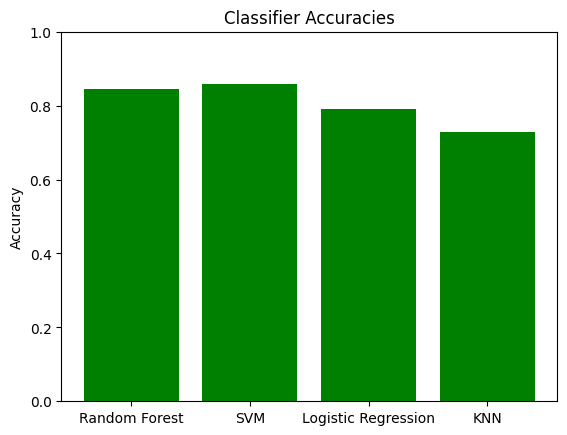

In [195]:
# Define the names of the classifiers and their corresponding accuracy values
classifiers = ["Random Forest", "SVM", "Logistic Regression", "KNN"]
accuracies = [0.8444444444444444, 0.8577777777777778, 0.7911111111111111, 0.7288888888888889]

# Plot the bar graph
plt.bar(classifiers, accuracies, color='green')
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')

# Display the graph
plt.show()